In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #avoid warning flash
warnings.filterwarnings('ignore')
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score, classification_report, recall_score


### Data Load

In [3]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
print('Shape of Diabetes dataset is :',dataframe.shape)
print('Size of Diabetes dataset is  :',dataframe.size)

Shape of Diabetes dataset is : (768, 9)
Size of Diabetes dataset is  : 6912


In [5]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Drop if there are duplicates rows.
dataframe = dataframe.drop_duplicates()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Pre Processing

In [8]:
# show how many columns has 0 values and sum it

featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


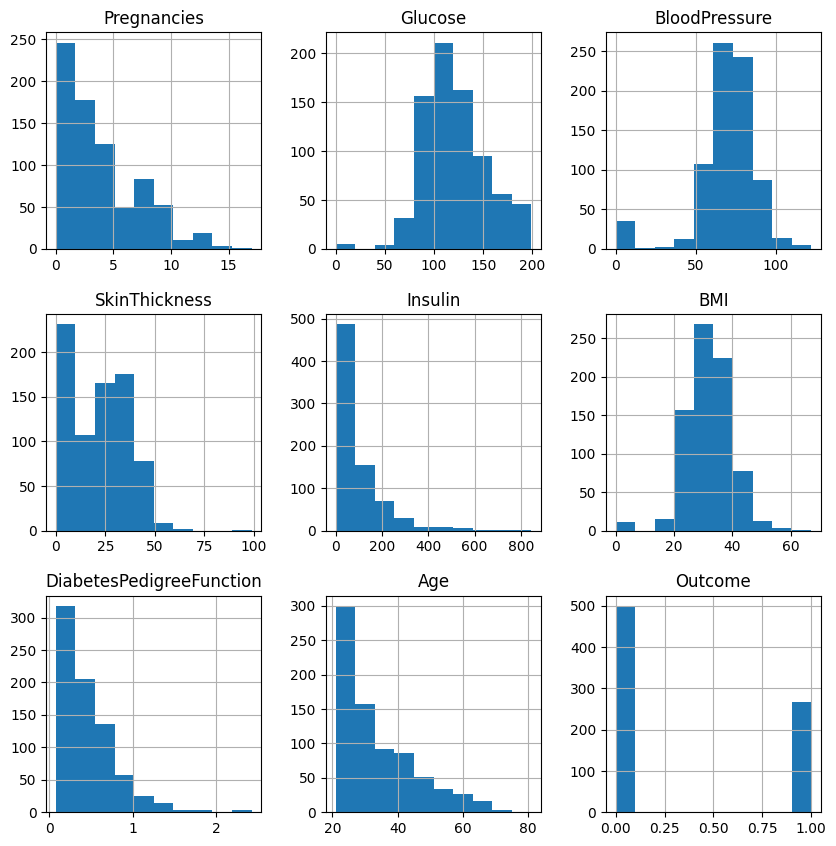

In [9]:
# Analyze feature distributions
features = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age',	'Outcome']


dataframe.hist(figsize=(10, 10))

plt.subplots_adjust(bottom=0.1)  # Adjust space for readability
plt.show()

In [10]:
# Replacing 0 values with mean or median of that column
dataframe['Glucose']=dataframe['Glucose'].replace(0,dataframe['Glucose'].mean())#normal distribution
dataframe['BloodPressure']=dataframe['BloodPressure'].replace(0,dataframe['BloodPressure'].mean())#normal distribution
dataframe['SkinThickness']=dataframe['SkinThickness'].replace(0,dataframe['SkinThickness'].median())#skewed distribution
dataframe['Insulin']=dataframe['Insulin'].replace(0,dataframe['Insulin'].median())#skewed distribution
dataframe['BMI']=dataframe['BMI'].replace(0,dataframe['BMI'].mean())#normal distribution

In [11]:
# Now verify whether there are any 0 values
featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [12]:
# replacing the value 0 and 1 in column name Outcome for readability
dataframe["Outcome"].replace(0,"Non-Diabetic",inplace=True) 
dataframe["Outcome"].replace(1,"Diabetic",inplace=True)
dataframe["Outcome"]

0          Diabetic
1      Non-Diabetic
2          Diabetic
3      Non-Diabetic
4          Diabetic
           ...     
763    Non-Diabetic
764    Non-Diabetic
765    Non-Diabetic
766        Diabetic
767    Non-Diabetic
Name: Outcome, Length: 768, dtype: object

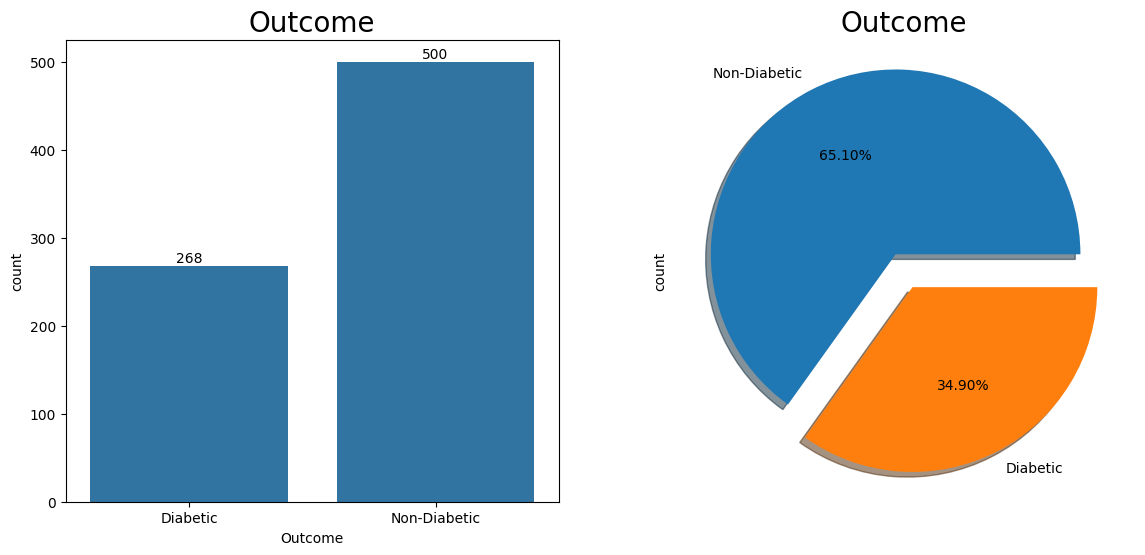

In [13]:
# plot the no of patients 
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Outcome', data=dataframe)
ax.bar_label(ax.containers[0])
plt.title("Outcome", fontsize=20)

ax =plt.subplot(1,2,2)
ax=dataframe['Outcome'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Outcome", fontsize = 20);

In [14]:
# for my analysis purpose i am saving the diabetic and non-diabetic data in different variables.
Diabetic = dataframe[dataframe["Outcome"]=="Diabetic"]
Non_diabetic = dataframe[dataframe["Outcome"]=="Non-Diabetic"]
Diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,Diabetic
2,8,183.0,64.0,23,30.5,23.3,0.672,32,Diabetic
4,0,137.0,40.0,35,168.0,43.1,2.288,33,Diabetic
6,3,78.0,50.0,32,88.0,31.0,0.248,26,Diabetic
8,2,197.0,70.0,45,543.0,30.5,0.158,53,Diabetic


In [15]:
x1=len(dataframe[dataframe["Glucose"]<=140])
x2=len(dataframe[(dataframe["Glucose"]>140)&(dataframe["Glucose"]<=199)])
x3=len(dataframe[dataframe["Glucose"]>=200])
print("patient count having normal Blood sugar :",x1)
print("patient count having prediabetes :",x2)
print("patient count having abnormal glucose :",x3)

patient count having normal Blood sugar : 576
patient count having prediabetes : 192
patient count having abnormal glucose : 0


In [16]:
### saving the patient details whose Glucose level is normal and are diabetic in a dataframe.
a=dataframe[(dataframe["Glucose"]<=140)&(dataframe["Outcome"]=="Diabetic")]
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.000000,35,168.0,43.100000,2.288,33,Diabetic
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,Diabetic
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,Diabetic
15,7,100.0,69.105469,23,30.5,30.000000,0.484,32,Diabetic
16,0,118.0,84.000000,47,230.0,45.800000,0.551,31,Diabetic
...,...,...,...,...,...,...,...,...,...
743,9,140.0,94.000000,23,30.5,32.700000,0.734,45,Diabetic
750,4,136.0,70.000000,23,30.5,31.200000,1.182,22,Diabetic
755,1,128.0,88.000000,39,110.0,36.500000,1.057,37,Diabetic
757,0,123.0,72.000000,23,30.5,36.300000,0.258,52,Diabetic


In [17]:
z=dataframe[(dataframe["Age"]>=35) & (dataframe["BMI"]>=30)& (dataframe["Outcome"]=="Diabetic")]
z


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.600000,0.627,50,Diabetic
8,2,197.0,70.0,45,543.0,30.500000,0.158,53,Diabetic
9,8,125.0,96.0,23,30.5,31.992578,0.232,54,Diabetic
13,1,189.0,60.0,23,846.0,30.100000,0.398,59,Diabetic
22,7,196.0,90.0,23,30.5,39.800000,0.451,41,Diabetic
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39,110.0,36.500000,1.057,37,Diabetic
757,0,123.0,72.0,23,30.5,36.300000,0.258,52,Diabetic
759,6,190.0,92.0,23,30.5,35.500000,0.278,66,Diabetic
761,9,170.0,74.0,31,30.5,44.000000,0.403,43,Diabetic


In [18]:
z[z["Pregnancies"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
66,0,109.0,88.0,30,30.5,32.5,0.855,38,Diabetic
440,0,189.0,104.0,25,30.5,34.3,0.435,41,Diabetic
506,0,180.0,90.0,26,90.0,36.5,0.314,35,Diabetic
757,0,123.0,72.0,23,30.5,36.3,0.258,52,Diabetic


In [19]:
dataframe = dataframe.replace({'Outcome': {'Non-Diabetic': 0, 'Diabetic': 1}})
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


### Outlier

Feature: Pregnancies
Number of outliers (IQR): 4
Feature: Glucose
Number of outliers (IQR): 0
Feature: BloodPressure
Number of outliers (IQR): 14
Feature: SkinThickness
Number of outliers (IQR): 35
Feature: Insulin
Number of outliers (IQR): 49
Feature: BMI
Number of outliers (IQR): 8
Feature: DiabetesPedigreeFunction
Number of outliers (IQR): 29
Feature: Age
Number of outliers (IQR): 9
Feature: Outcome
Number of outliers (IQR): 0


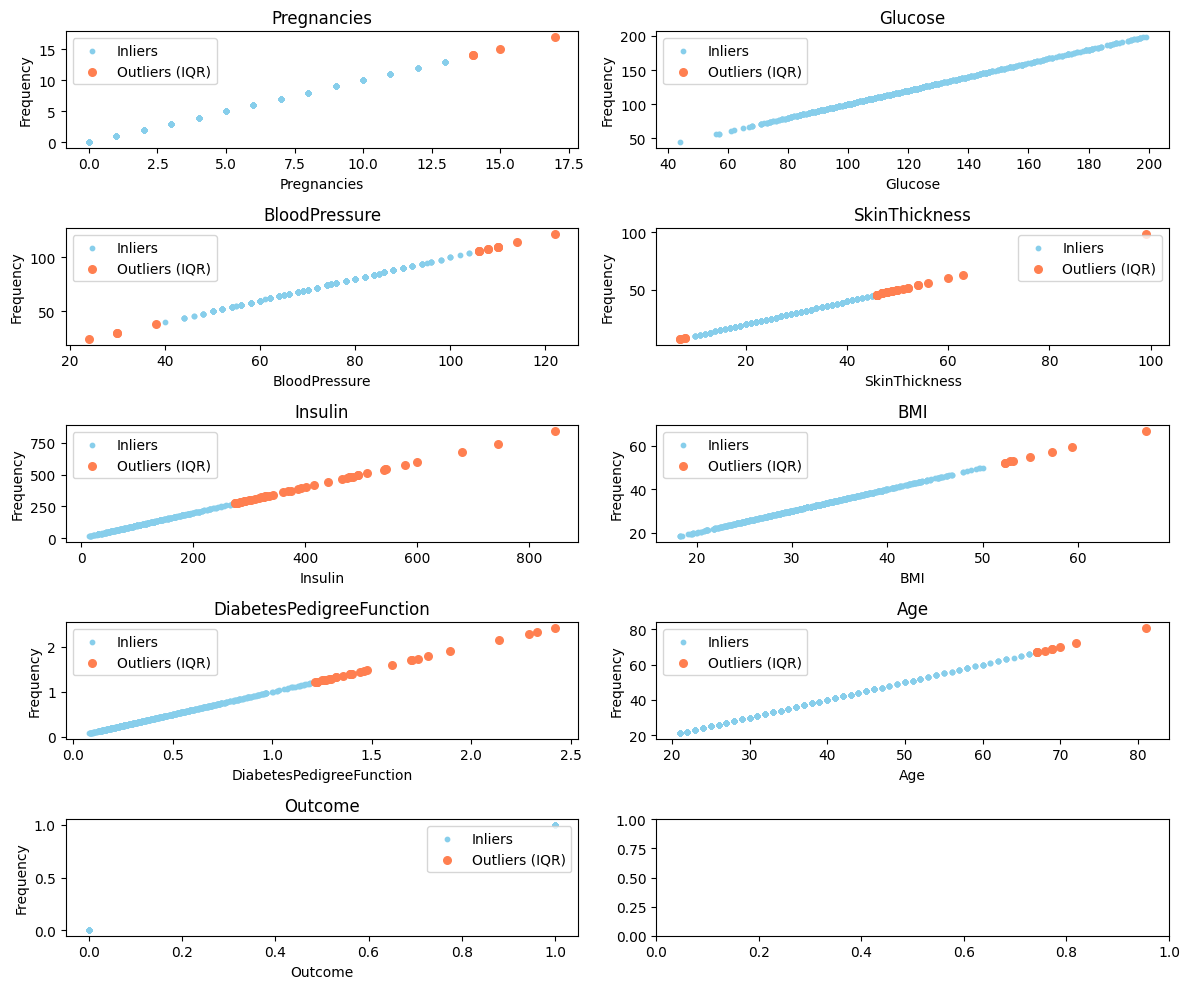

In [20]:
import math
# Define colors for inliers and outliers
inlier_color = 'skyblue'
outlier_color = 'coral'

# Analyze outliers and plot (adjusted for correct subplot access)

rows = int(math.ceil(len(features) / 2))  # Adjust rows for all features
cols = 2  # Adjust columns as needed
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))  # Create subplots according to rows and columns

for i, feature in enumerate(features):
  # IQR method for outlier detection
  q1 = dataframe[feature].quantile(0.25)
  q3 = dataframe[feature].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  # Separate inliers and outliers
  inliers = (dataframe[feature] >= lower_bound) & (dataframe[feature] <= upper_bound)
  outliers = ~inliers  # Invert boolean mask for outliers
  num_outliers = outliers.sum()

  print(f"Feature: {feature}")
  print(f"Number of outliers (IQR): {num_outliers}")
 

  # Reduce verbosity for clarity (optional)
  inlier_data = dataframe.loc[inliers, feature]
  outlier_data = dataframe.loc[outliers, feature]

  # Plot distribution with inliers and outliers highlighted
  current_ax = axes.flat[i]  # Access subplot using flattened index
  current_ax.scatter(dataframe.loc[inliers, feature], dataframe.loc[inliers, feature], color=inlier_color, s=10, label='Inliers')
  current_ax.scatter(dataframe.loc[outliers, feature], dataframe.loc[outliers, feature], color=outlier_color, s=30, label='Outliers (IQR)')

  # Customize plot
  current_ax.set_title(feature)
  current_ax.set_xlabel(feature)
  current_ax.set_ylabel('Frequency')
  current_ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [21]:
df_selected=dataframe.copy(deep=True)

# Handling Outliers


x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age', 'Outcome']
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


In [22]:
for i, feature in enumerate(features):
  # IQR method for outlier detection
  q1 = df_new[feature].quantile(0.25)
  q3 = df_new[feature].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  # Separate inliers and outliers
  inliers = (df_new[feature] >= lower_bound) & (df_new[feature] <= upper_bound)
  outliers = ~inliers  # Invert boolean mask for outliers
  num_outliers = outliers.sum()

  print(f"Feature: {feature}")
  print(f"Number of outliers (IQR): {num_outliers}")

Feature: Pregnancies
Number of outliers (IQR): 0
Feature: Glucose
Number of outliers (IQR): 0
Feature: BloodPressure
Number of outliers (IQR): 0
Feature: SkinThickness
Number of outliers (IQR): 0
Feature: Insulin
Number of outliers (IQR): 0
Feature: BMI
Number of outliers (IQR): 0
Feature: DiabetesPedigreeFunction
Number of outliers (IQR): 0
Feature: Age
Number of outliers (IQR): 0
Feature: Outcome
Number of outliers (IQR): 0


In [23]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


In [24]:
x = df_new.drop(columns='Outcome', axis=1)
y = df_new['Outcome']


### Information Gain

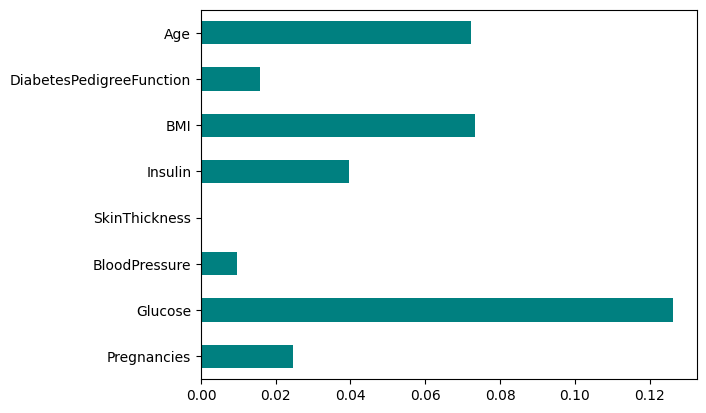

In [25]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

importances = mutual_info_classif(x, y)
feat_importances = pd.Series(importances, df_new.columns [0:len(df_new.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()


### Correlation matrix

<Axes: >

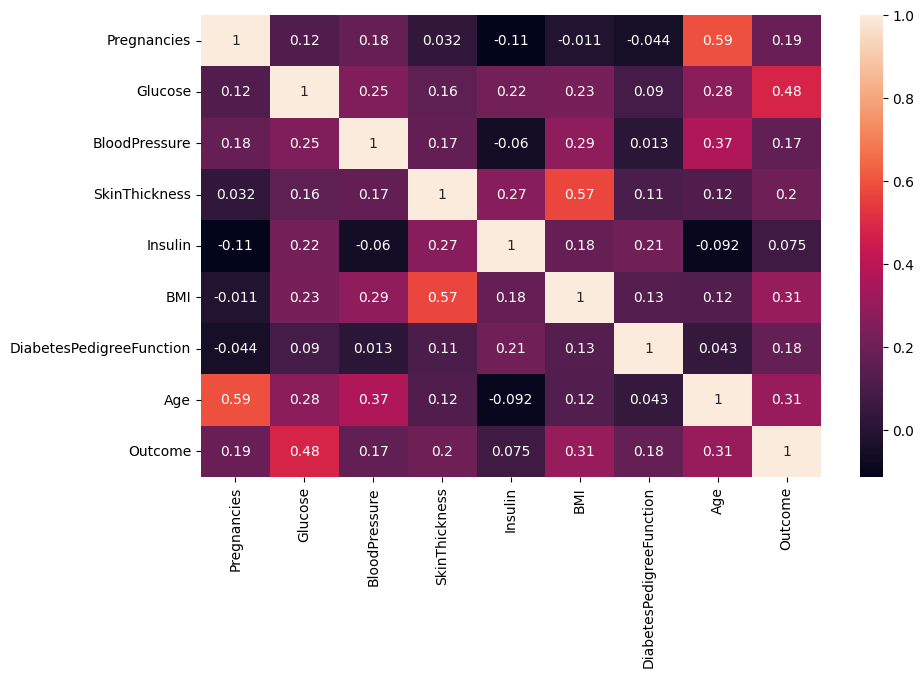

In [26]:
cor = df_new.corr()

# plotting Heatmap

plt.figure(figsize = (10,6))
sns.heatmap(cor,annot = True )

In [27]:
X_1 = df_new.drop(columns=['Outcome','Pregnancies','SkinThickness'], axis=1)
Y = df_new['Outcome']

### Scaling

In [28]:

from sklearn.preprocessing import StandardScaler


# Standardize features (assuming x is your feature matrix)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_1)

# Convert the scaled array to a DataFrame
X = pd.DataFrame(x_scaled, columns=X_1.columns)

display(X)

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.073298,0.058214,-0.896974,0.315479,0.868112,1.336158
1,-1.414423,-0.727336,-0.896974,-0.992612,-0.083651,0.210426
2,1.580765,-0.923724,-0.896974,-1.461720,0.976370,0.301282
3,-1.299397,-0.727336,0.599154,-0.746781,-1.362442,-1.688693
4,0.766561,-1.713789,1.229734,1.476974,1.720640,0.372194
...,...,...,...,...,...,...
763,-0.767119,0.518710,1.301663,0.182415,-1.346655,1.630887
764,0.213985,-0.169776,-0.896974,0.901865,-0.151312,-0.288176
765,0.171132,0.058214,0.778977,-1.042229,-0.848219,0.110705
766,0.414717,-1.262323,-0.896974,-0.394949,-0.090417,1.258597


### Spliting

In [29]:
# Train And Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_scaled,Y,test_size=0.2)

## Model Selection

In [30]:
from sklearn.metrics import confusion_matrix,recall_score

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

X_1 = df_new.drop(columns=['Outcome','Pregnancies','SkinThickness'], axis=1)
Y = df_new['Outcome']

# Standardize features (assuming x is your feature matrix)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_1)

X_train, X_test, y_train, y_test= train_test_split(x_scaled,Y,test_size=0.2)

random = RandomForestClassifier()
random.fit(X_train, y_train)
y_pred_ran = random.predict(X_test)

random_train = round(random.score(X_train, y_train) * 100, 2)
random_accuracy = round(accuracy_score(y_pred_ran, y_test) * 100, 2)
random_recall = round(recall_score(y_test, y_pred_ran) * 100, 2)

print("Training Accuracy    :",random_train ,"%")
print("Model Accuracy Score :",random_accuracy ,"%")
print("Model Recall Score   :", random_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_ran))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ran))

Training Accuracy    : 100.0 %
Model Accuracy Score : 75.32 %
Model Recall Score   : 64.15 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       101
         1.0       0.64      0.64      0.64        53

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

--------------------------------------------------------

Confusion Matrix:
 [[82 19]
 [19 34]]


### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

X_1 = df_new.drop(columns=['Outcome','Pregnancies','SkinThickness'], axis=1)
Y = df_new['Outcome']

# Standardize features (assuming x is your feature matrix)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_1)

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

logic = LogisticRegression()
logic.fit(X_train, y_train)
y_pred_lr = logic.predict(X_test)

log_train = round(logic.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)
log_recall = round(recall_score(y_test, y_pred_lr) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("Model Recall Score   :", log_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Training Accuracy    : 78.83 %
Model Accuracy Score : 72.08 %
Model Recall Score   : 54.24 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        95
         1.0       0.67      0.54      0.60        59

    accuracy                           0.72       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.72      0.72      0.71       154

--------------------------------------------------------

Confusion Matrix:
 [[79 16]
 [27 32]]


### SVM

In [33]:
from sklearn.svm import SVC

X_1 = df_new.drop(columns=['Outcome','Pregnancies','SkinThickness'], axis=1)
Y = df_new['Outcome']

# Standardize features (assuming x is your feature matrix)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_1)

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
svc_recall = round(recall_score(y_test, y_pred_svc) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("Model Recall Score   :", svc_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Training Accuracy    : 80.29 %
Model Accuracy Score : 71.43 %
Model Recall Score   : 50.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80       106
         1.0       0.55      0.50      0.52        48

    accuracy                           0.71       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.71      0.71      0.71       154

--------------------------------------------------------

Confusion Matrix:
 [[86 20]
 [24 24]]


### Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

X_1 = df_new.drop(columns=['Outcome','Pregnancies','SkinThickness'], axis=1)
Y = df_new['Outcome']

# Standardize features (assuming x is your feature matrix)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_1)

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)
decision_recall = round(recall_score(y_test, y_pred_dec) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("Model Recall Score   :", decision_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dec))

Training Accuracy    : 100.0 %
Model Accuracy Score : 70.13 %
Model Recall Score   : 50.94 %
--------------------------------------------------------


Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       101
         1.0       0.57      0.51      0.54        53

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

--------------------------------------------------------

Confusion Matrix:
 [[81 20]
 [26 27]]


### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

X_1 = df_new.drop(columns=['Outcome','Pregnancies','SkinThickness'], axis=1)
Y = df_new['Outcome']

# Standardize features (assuming x is your feature matrix)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_1)

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_recall = round(recall_score(y_test, y_pred_knn) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("Model Recall Score   :", knn_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Training Accuracy    : 85.18 %
Model Accuracy Score : 69.48 %
Model Recall Score   : 50.88 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.74      0.80      0.77        97
         1.0       0.60      0.51      0.55        57

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154

--------------------------------------------------------

Confusion Matrix:
 [[78 19]
 [28 29]]


### Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

X_1 = df_new.drop(columns=['Outcome','Pregnancies','SkinThickness'], axis=1)
Y = df_new['Outcome']

# Standardize features (assuming x is your feature matrix)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_1)

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

# Create Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)
# y_pred_proba_gb = gb_classifier.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate model performance
gb_train = round(gb_classifier.score(X_train, y_train) * 100, 2)
gb_accuracy = round(accuracy_score(y_test, y_pred_gb) * 100, 2)
gb_recall = round(recall_score(y_test, y_pred_gb) * 100, 2)

print("Training Accuracy    :",gb_train ,"%")
print("Model Accuracy Score:", gb_accuracy, "%")
print("Model Recall Score   :", gb_recall, "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Training Accuracy    : 91.04 %
Model Accuracy Score: 77.92 %
Model Recall Score   : 60.94 %

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.90      0.83        90
         1.0       0.81      0.61      0.70        64

    accuracy                           0.78       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.78      0.78      0.77       154


Confusion Matrix:
 [[81  9]
 [25 39]]


In [37]:
X = dataframe.drop(columns=['Outcome'], axis=1)
Y = dataframe['Outcome']


In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

X_1 = df_new.drop(columns=['Outcome','Pregnancies','SkinThickness'], axis=1)
Y = df_new['Outcome']

# Standardize features (assuming x is your feature matrix)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_1)

X_train, X_test, y_train, y_test= train_test_split(x_scaled,Y,test_size=0.2)

# Define specific parameters for each estimator
estimators = [
    ('lr', logic),  # Set C for LogisticRegression
    ('rf', random),   # RandomForest has its own parameters
    ('ab', decision)    # No parameters needed for DecisionTree
]

eclf = VotingClassifier(estimators=estimators, voting='soft')
params = {'lr__C': [10.0, 100.0]}  # Only parameters for LogisticRegression
Voting_Classifier_soft = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
Voting_Classifier_soft.fit(X_train, y_train)

y_pred = Voting_Classifier_soft.predict(X_test)


acc_lrd_soft = round(Voting_Classifier_soft.score(X_train, y_train) * 100, 2)
acc_test_lrd_soft = round(Voting_Classifier_soft.score(X_test, y_test) * 100, 2)
recall_lrd_soft = round(recall_score(y_test, y_pred) * 100, 2)

print("Training Accuracy    :",acc_lrd_soft,"%")
print("Model Accuracy Score :",acc_test_lrd_soft ,"%")
print("Model Recall Score   :", recall_lrd_soft, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Accuracy    : 100.0 %
Model Accuracy Score : 71.43 %
Model Recall Score   : 44.9 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       105
         1.0       0.56      0.45      0.50        49

    accuracy                           0.71       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.70      0.71      0.70       154

--------------------------------------------------------

Confusion Matrix:
 [[88 17]
 [27 22]]


Training Accuracy    : 97.56 %
Model Accuracy Score : 72.73 %
Model Recall Score   : 50.85 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.74      0.86      0.80        95
         1.0       0.70      0.51      0.59        59

    accuracy                           0.73       154
   macro avg       0.72      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154

--------------------------------------------------------

Confusion Matrix:
 [[82 13]
 [29 30]]


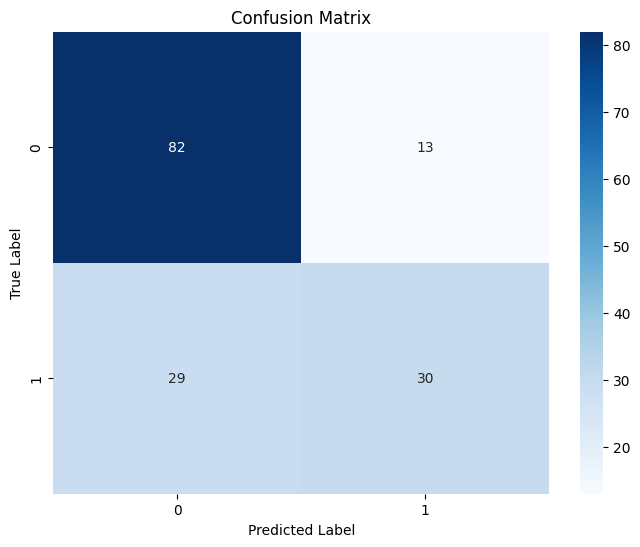

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier

X_1 = df_new.drop(columns=['Outcome','Pregnancies','SkinThickness'], axis=1)
Y = df_new['Outcome']

# Standardize features (assuming x is your feature matrix)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_1)

X_train, X_test, y_train, y_test= train_test_split(x_scaled,Y,test_size=0.2)



# Define specific parameters for each estimator
logic = LogisticRegression()
random = RandomForestClassifier()
decision = DecisionTreeClassifier()

bagging = BaggingClassifier()
boosting = GradientBoostingClassifier()

stacking = StackingClassifier(estimators=[('lr', logic), ('rf', random), ('ab', decision)], 
                              final_estimator=logic)

estimators = [
    ('lr', bagging),  # Set C for LogisticRegression
    ('rf', boosting),   # RandomForest has its own parameters
    ('ab', stacking)    # No parameters needed for DecisionTree
]

eclf = VotingClassifier(estimators=estimators, voting='soft')
params = {'lr__n_estimators': [10, 100]}  # Only parameters for LogisticRegression
Voting_Classifier_soft = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
Voting_Classifier_soft.fit(X_train, y_train)

y_pred = Voting_Classifier_soft.predict(X_test)

acc_lrd_soft = round(Voting_Classifier_soft.score(X_train, y_train) * 100, 2)
acc_test_lrd_soft = round(Voting_Classifier_soft.score(X_test, y_test) * 100, 2)
recall_lrd_soft = round(recall_score(y_test, y_pred) * 100, 2)

print("Training Accuracy    :", acc_lrd_soft, "%")
print("Model Accuracy Score :", acc_test_lrd_soft, "%")
print("Model Recall Score   :", recall_lrd_soft, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix with title
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Comparing Different Models

In [40]:
# Create a variable 
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Decission Tree', 'Random Forest','Gradient Boosting', 'Diabetes Prediction Model'],
                       'Training Accuracy':[svc_train,knn_train,log_train,decision_train, random_train, gb_train, acc_lrd_soft ],
                       'Model Accuracy':[svc_accuracy,knn_accuracy,log_accuracy,decision_accuracy, random_accuracy, gb_accuracy, acc_test_lrd_soft ],
                       'Model Recall':[svc_recall,knn_recall,log_recall,decision_recall,random_recall,gb_recall,recall_lrd_soft]})

models.style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'color': 'LigntGreen',
            'font-size': '15px'
        })


,Model,Training Accuracy,Model Accuracy,Model Recall
0,Support Vector Machines,80.290000,71.430000,50.000000
1,KNN,85.180000,69.480000,50.880000
2,Logistic Regression,78.830000,72.080000,54.240000
3,Decission Tree,100.000000,70.130000,50.940000
4,Random Forest,100.000000,75.320000,64.150000
5,Gradient Boosting,91.040000,77.920000,60.940000
6,Diabetes Prediction Model,98.400000,78.070000,63.740000


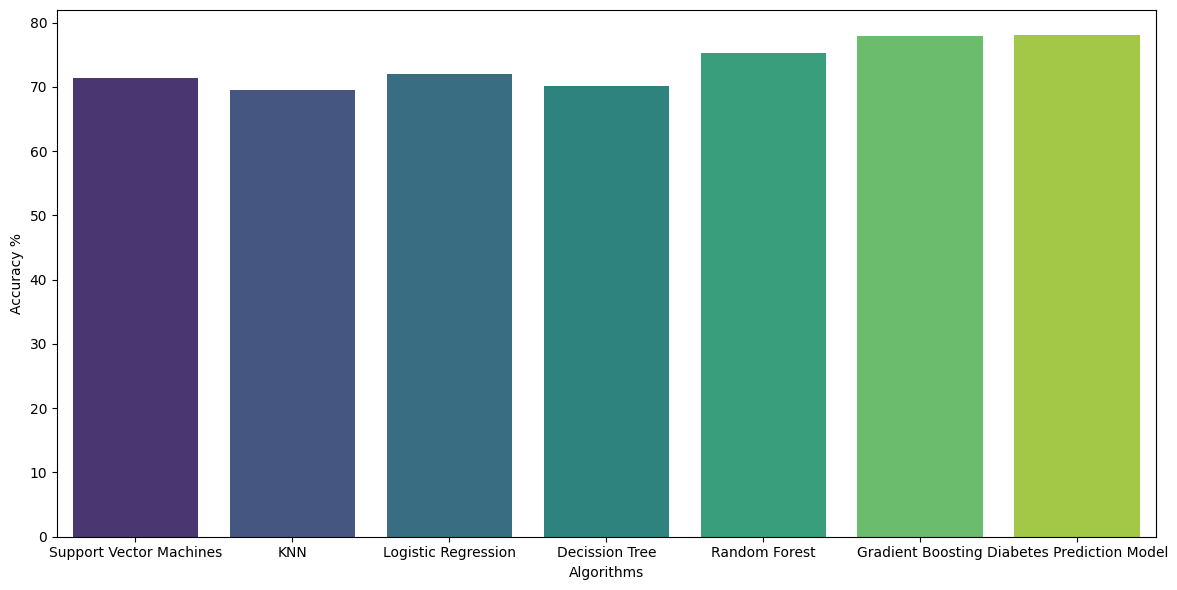

In [41]:
plt.figure(figsize=(12,6))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Model Accuracy'],palette='viridis' )

plt.yticks(np.arange(0, max(models['Model Accuracy']) + 10, 10))  # Set y-ticks to show every 10 units.
plt.tight_layout()
plt.show()

## Final Prediction

In [45]:
# Make predictions on unseen data, here i have given random values for each features in the input_data
# take the data  and store in the variable 
input_data = (2,80,90,40,150,24,0.727000,20)
# Convert tuple to list
input_list = list(input_data)

# Drop indices 0 and 3
indices_to_drop = [0, 3]
for index in sorted(indices_to_drop, reverse=True):
    del input_list[index]

# Convert list back to tuple
input_data_modified = tuple(input_list)

print(input_data_modified)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data_modified) # converting this list into numpy array

# reshape the numpy array as we are predicting for one instance

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

(80, 90, 150, 24, 0.727, 20)
[[ 80.     90.    150.     24.      0.727  20.   ]]


In [46]:
# predict
predictions = Voting_Classifier_soft.predict(input_data_reshaped)
print(predictions)
if predictions[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted to not have diabetes.")

[1.]
The patient is predicted to have diabetes.
